<a href="https://colab.research.google.com/github/vicmcl/ml-laptime/blob/main/ml_laptime/notebook/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from pathlib import Path
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [2]:
# Mount Drive
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive')
DRIVE_PATH = Path("/content/drive/MyDrive/")
ML_PATH = DRIVE_PATH / "Projects" / "laptime-simulation"

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [3]:
data_path = glob.glob(str(ML_PATH / "races_*.pkl"))

In [4]:
pip install -q fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.3 MB/s eta 0:00:00


In [5]:
data_path

['/content/drive/MyDrive/Projects/laptime-simulation/races_2019.pkl',
 '/content/drive/MyDrive/Projects/laptime-simulation/races_2020.pkl',
 '/content/drive/MyDrive/Projects/laptime-simulation/races_2021.pkl']

In [400]:
data = {}

for path in data_path:
    with open(path, "rb") as f:
        data[int(path.split(".")[0][-4:])] = pickle.load(f)

In [169]:
columns_laps = [
    'Time', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
    'Compound', 'TyreLife', 'LapTime', 'PitOutTime', 'PitInTime'
]

columns_telemetry = ['SessionTime', 'Throttle', 'Brake']

columns_weather = ['Time', 'TrackTemp']

compound_map = {
    'SOFT': 1.0,
    'MEDIUM': 2.0,
    'HARD': 3.0
}

In [407]:
data[2019]['Austrian Grand Prix']['laps'].head(12)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:34:09.256000,VER,33,0 days 00:01:16.629000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:32.619000,...,False,Red Bull Racing,0 days 00:32:52.408000,2019-06-30 13:12:52.435,1,7.0,False,,False,False
1,0 days 00:35:20.751000,VER,33,0 days 00:01:11.495000,2.0,1.0,NaT,NaT,0 days 00:00:17.950000,0 days 00:00:31.755000,...,False,Red Bull Racing,0 days 00:34:09.256000,2019-06-30 13:14:09.283,1,7.0,False,,False,True
2,0 days 00:36:31.750000,VER,33,0 days 00:01:10.999000,3.0,1.0,NaT,NaT,0 days 00:00:17.477000,0 days 00:00:31.601000,...,False,Red Bull Racing,0 days 00:35:20.751000,2019-06-30 13:15:20.778,1,7.0,False,,False,True
3,0 days 00:37:42.850000,VER,33,0 days 00:01:11.100000,4.0,1.0,NaT,NaT,0 days 00:00:17.384000,0 days 00:00:31.655000,...,False,Red Bull Racing,0 days 00:36:31.750000,2019-06-30 13:16:31.777,1,7.0,False,,False,True
4,0 days 00:38:53.689000,VER,33,0 days 00:01:10.839000,5.0,1.0,NaT,NaT,0 days 00:00:17.175000,0 days 00:00:31.891000,...,False,Red Bull Racing,0 days 00:37:42.850000,2019-06-30 13:17:42.877,1,7.0,False,,False,True
5,0 days 00:40:04.125000,VER,33,0 days 00:01:10.436000,6.0,1.0,NaT,NaT,0 days 00:00:17.405000,0 days 00:00:31.538000,...,False,Red Bull Racing,0 days 00:38:53.689000,2019-06-30 13:18:53.716,1,7.0,False,,False,True
6,0 days 00:41:13.868000,VER,33,0 days 00:01:09.743000,7.0,1.0,NaT,NaT,0 days 00:00:17.303000,0 days 00:00:31.206000,...,False,Red Bull Racing,0 days 00:40:04.125000,2019-06-30 13:20:04.152,1,6.0,False,,False,True
7,0 days 00:42:24.442000,VER,33,0 days 00:01:10.574000,8.0,1.0,NaT,NaT,0 days 00:00:17.397000,0 days 00:00:31.332000,...,False,Red Bull Racing,0 days 00:41:13.868000,2019-06-30 13:21:13.895,1,6.0,False,,False,True
8,0 days 00:43:34.386000,VER,33,0 days 00:01:09.944000,9.0,1.0,NaT,NaT,0 days 00:00:17.560000,0 days 00:00:31.177000,...,False,Red Bull Racing,0 days 00:42:24.442000,2019-06-30 13:22:24.469,1,5.0,False,,False,True
9,0 days 00:44:44.257000,VER,33,0 days 00:01:09.871000,10.0,1.0,NaT,NaT,0 days 00:00:17.706000,0 days 00:00:31.055000,...,False,Red Bull Racing,0 days 00:43:34.386000,2019-06-30 13:23:34.413,1,5.0,False,,False,True


In [170]:
def process_track_status(gp, year):
    track_status = data[year][gp]['status'].copy()
    track_status['Incident'] = track_status['Status'].map(lambda s: False if s == '1' else True)
    mask = track_status['Incident'] & track_status['Incident'].shift(1)
    track_status = track_status[~mask][['Time', 'Incident']]
    return track_status

In [396]:
def laps_with_incident(laps, incident_times, allclear_times):
    laps_to_remove = []
    # Loop over every incident
    for start_incident, end_incident in zip(incident_times, allclear_times):
        i = 0
        # Find the first impacted lap
        print('start incident', start_incident)
        while pd.Timedelta(laps['Time'].iloc[i]) < start_incident:
            print(pd.Timedelta(laps['Time'].iloc[i]))
            i += 1
        laps_to_remove.append(laps['Time'].iloc[i])

        # If the incident is not over by the end of the lap, remove the next lap
        # and repeat until the incident is over
        while pd.Timedelta(laps['Time'].iloc[i]) < end_incident:
            laps_to_remove.append(laps['Time'].iloc[i + 1])
            i += 1
    return laps_to_remove

In [350]:
def remove_incidents(laps, track_status):
    laps_data = laps.copy()
    incident_times = track_status[track_status['Incident'] == True]['Time'].tolist()
    allclear_times = track_status[track_status['Incident'] == False]['Time'].iloc[1:].tolist()
    laps_to_remove = laps_with_incident(laps_data, incident_times, allclear_times)
    laps_data = laps_data[~laps_data["Time"].isin(laps_to_remove)]
    return laps_data

In [173]:
def remove_pitstops(laps):
    laps_data = laps.copy()
    mask = pd.isnull(laps_data['PitOutTime']) & pd.isnull(laps_data['PitInTime'])
    laps_data = laps_data[mask]
    laps_data = laps_data.drop(['PitOutTime', 'PitInTime'], axis=1)
    return laps_data

In [390]:
def process_lap_data(gp, year):
    laps_data = data[year][gp]['laps'][columns_laps].copy()
    laps_data['Season'] = year
    laps_data = laps_data.reset_index().drop('index', axis=1)
    laps_data['Compound'] = laps_data['Compound'].map(lambda x: compound_map.get(x, 0.0))
    laps_data = remove_pitstops(laps_data)
    track_status = process_track_status(gp, year)
    laps_data = remove_incidents(laps_data, track_status)
    return laps_data

In [181]:
def map_drs(drs):
    if drs >= 10:
        return True
    else:
        return False

def process_telemetry_data(gp, year, laps):
    telemetry_data = data[year][gp]['telemetry'][columns_telemetry].copy()
    telemetry_with_laps = pd.merge_asof(
        telemetry_data,
        laps[['Time', 'LapNumber']],
        left_on='SessionTime',
        right_on='Time',
        direction='forward'
    ).drop('Time', axis=1)
    #telemetry_with_laps.loc[:, 'DRS'] = telemetry_with_laps['DRS'].map(map_drs)
    telemetry_avg = telemetry_with_laps.groupby('LapNumber').mean()
    return telemetry_avg

In [176]:
def process_weather_data(gp, year):
    weather_data = data[year][gp]['weather'][columns_weather].copy()
    return weather_data

In [177]:
def merge_data(laps, weather, telemetry):
    merged_data = pd.merge_asof(laps, weather, on='Time', direction='nearest').set_index('LapNumber').drop('Time', axis=1)
    merged_data = pd.concat([merged_data, telemetry], axis=1).reset_index()
    merged_data = merged_data.drop('SessionTime', axis=1)
    merged_data.loc[:, 'LapTime'] = merged_data['LapTime'].map(lambda x: x.total_seconds())
    return merged_data

In [178]:
def preprocess_data(gp, year):
    laps = process_lap_data(gp, year)
    weather = process_weather_data(gp, year)
    telemetry = process_telemetry_data(gp, year, laps)
    merged_data = merge_data(laps, weather, telemetry)
    return merged_data

In [179]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

In [397]:
si = SimpleImputer()

gp = 'Austrian Grand Prix'
df = pd.DataFrame()

for year in sorted(list(data.keys())):
    laps = process_lap_data(gp, year)
    weather = process_weather_data(gp, year)
    telemetry = process_telemetry_data(gp, year, laps)
    merged_data = merge_data(laps, weather, telemetry)
    for col in merged_data.columns:
        merged_data[col] = si.fit_transform(merged_data[[col]])
    df = pd.concat([df, merged_data])

df = df.reset_index(drop=True)
df = df.dropna(subset='LapTime')

#df['Lag1_LapTime'] = df['LapTime'].shift(1)
#df['SMA3_LapTime'] = df['LapTime'].shift(1).rolling(window=3).mean()

start incident 0 days 00:56:21.333000
0 days 00:34:00.748000
0 days 00:35:10.607000
0 days 00:36:19.987000
0 days 00:37:29.415000
0 days 00:38:38.766000
0 days 00:39:48.235000
0 days 00:40:57.812000
0 days 00:42:07.350000
0 days 00:43:16.809000


IndexError: single positional indexer is out-of-bounds

In [314]:
df.info()

<class 'fastf1.core.Laps'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LapNumber  172 non-null    float64
 1   Stint      172 non-null    float64
 2   SpeedI1    172 non-null    float64
 3   SpeedI2    172 non-null    float64
 4   SpeedFL    172 non-null    float64
 5   SpeedST    172 non-null    float64
 6   Compound   172 non-null    float64
 7   TyreLife   172 non-null    float64
 8   LapTime    172 non-null    float64
 9   Season     172 non-null    float64
 10  TrackTemp  172 non-null    float64
 11  Throttle   172 non-null    float64
 12  Brake      172 non-null    float64
dtypes: float64(13)
memory usage: 17.6 KB


In [328]:
df_train = df[df['Season'] < 2021]
laps_to_predict = 1
#df_train, df_test = df.iloc[:-remaining_laps], df.iloc[-remaining_laps:-remaining_laps + laps_to_predict]

In [329]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
tss = TimeSeriesSplit(n_splits=n_splits, test_size=laps_to_predict)

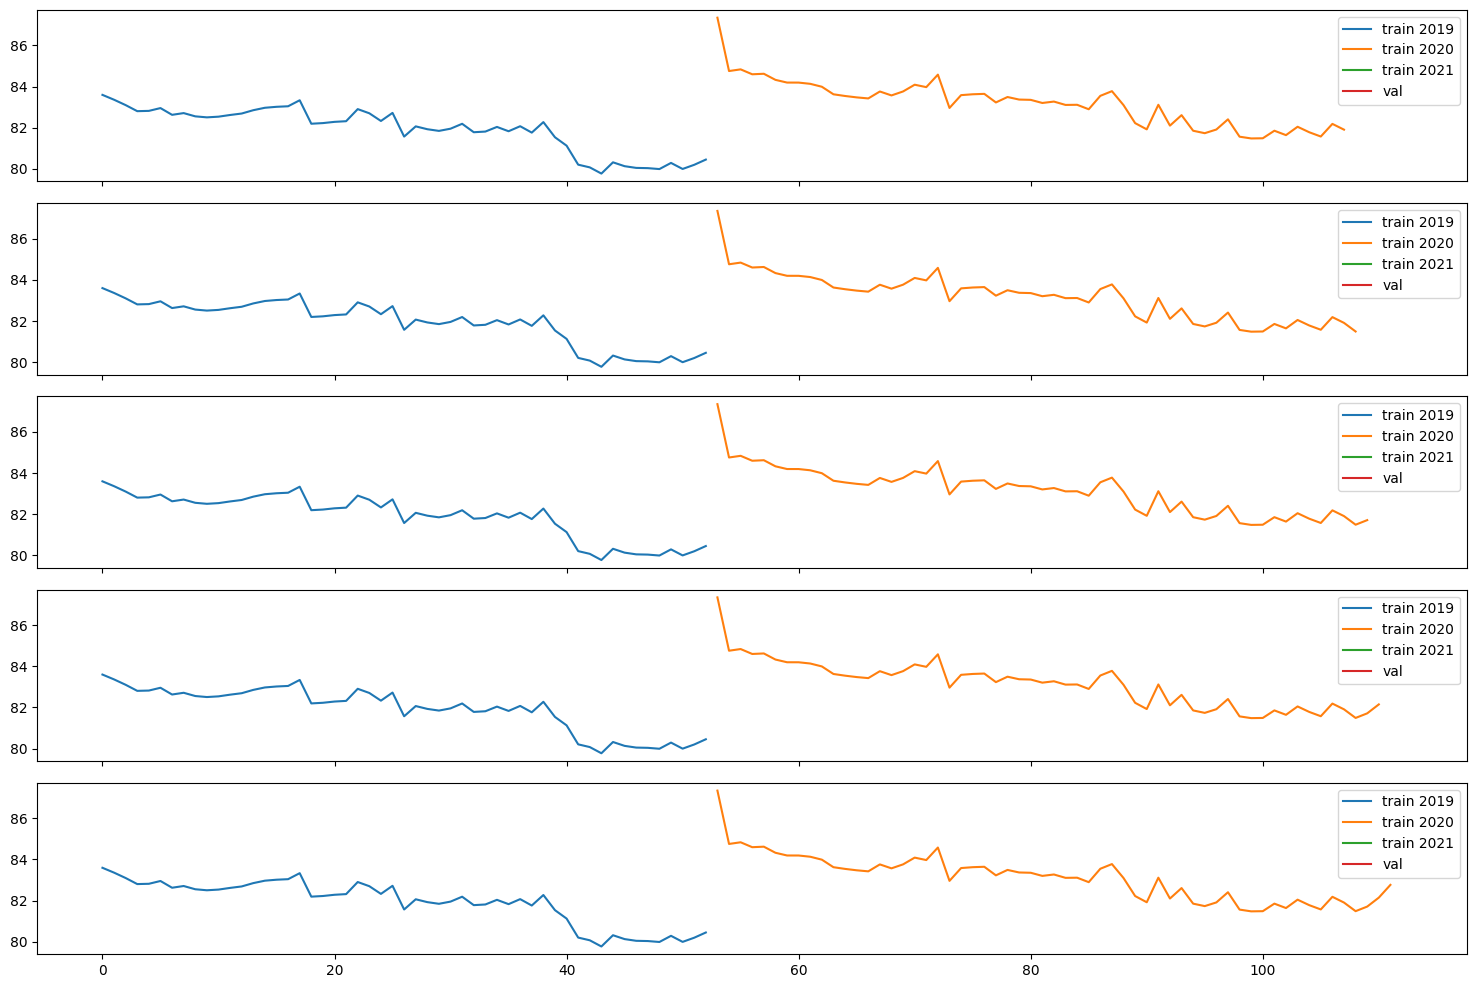

In [330]:
fig, axs = plt.subplots(n_splits, 1, figsize=(15, 10), sharex=True)
fold = 0
for train_idx, val_idx in tss.split(df_train):
    train = df_train.loc[train_idx]
    val = df_train.loc[val_idx]
    train[train['Season'] == 2019]['LapTime'].plot(ax=axs[fold], label='train 2019')
    train[train['Season'] == 2020]['LapTime'].plot(ax=axs[fold], label='train 2020')
    train[train['Season'] == 2021]['LapTime'].plot(ax=axs[fold], label='train 2021')
    val['LapTime'].plot(ax=axs[fold], label='val')
    axs[fold].legend()
    fold += 1
plt.tight_layout()
plt.show()

In [331]:
def select_speed_trap(data):
    corr = data[['LapTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].corr()
    speed_trap = corr['LapTime'].iloc[1:].abs().idxmax()
    return speed_trap

def filter_speed_trap(data, speed_trap):
    data = data.drop([speed for speed in ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST'] if speed != speed_trap], axis=1)
    data = data.rename(columns={speed_trap: 'SpeedTrap'})
    return data

In [332]:
for train_idx, val_idx in tss.split(df_train):
    break

speed_trap = select_speed_trap(df_train.loc[train_idx])

df_train = filter_speed_trap(df_train, speed_trap)
#df_train['Lag1_SpeedTrap'] = df_train['SpeedTrap'].shift(1)
#df_train['SMA3_SpeedTrap'] = df_train['SpeedTrap'].shift(1).rolling(window=3).mean()

#df_test['Lag1_SpeedTrap'] = df_test['SpeedTrap'].shift(1)
#df_test['SMA3_SpeedTrap'] = df_test['SpeedTrap'].shift(1).rolling(window=3).mean()

In [333]:
FEATURES = list(df_train.columns)
FEATURES.remove('LapTime')
TARGET = 'LapTime'

In [334]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [300, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

X_train = df_train[FEATURES]
y_train = df_train[TARGET]

model = xgb.XGBRegressor(random_state=42)

grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=tss,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
)

grid_search.fit(X_train, y_train, verbose=100)


# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


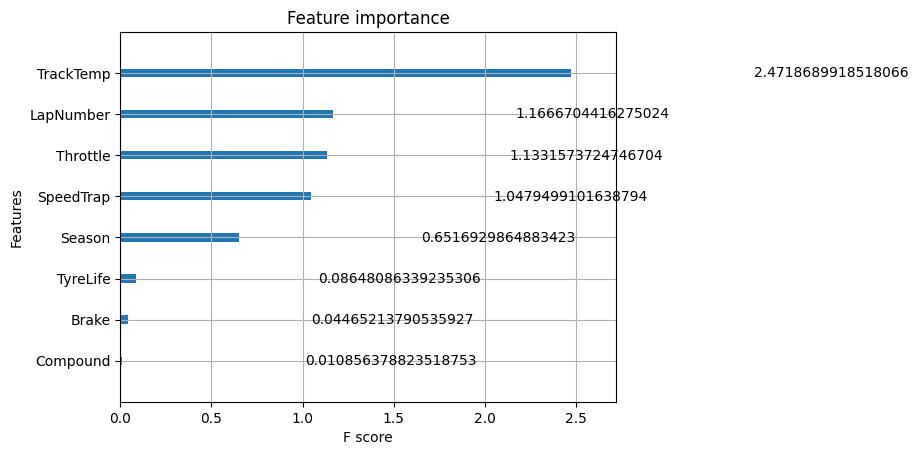

In [335]:
importance = best_model.get_booster().get_score(importance_type='gain')
xgb.plot_importance(best_model, importance_type='gain')
plt.show()

In [336]:
X_train = df_train[FEATURES]
y_train = df_train[TARGET]

best_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)],
    verbose=100
)

[0]	validation_0-rmse:1.24558
[100]	validation_0-rmse:0.58056
[200]	validation_0-rmse:0.30981
[300]	validation_0-rmse:0.18926
[400]	validation_0-rmse:0.13234
[500]	validation_0-rmse:0.10191
[600]	validation_0-rmse:0.08565
[700]	validation_0-rmse:0.07580
[800]	validation_0-rmse:0.06760
[900]	validation_0-rmse:0.06049
[999]	validation_0-rmse:0.05267


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [337]:
errors = []
scores = []
race_2021 = df[df['Season'] == 2021]
n_laps = len(race_2021)

for start_lap in range(1, n_laps - 2):
    remaining_laps = n_laps - start_lap

    df_test = race_2021.iloc[-remaining_laps:-remaining_laps + laps_to_predict]
    df_test = filter_speed_trap(df_test, speed_trap)
    df_test['Preds'] = best_model.predict(df_test[FEATURES])
    score_test = mean_squared_error(df_test['LapTime'], df_test['Preds'], squared=False)
    mae = (df_test['LapTime'] - df_test['Preds']).abs().mean()
    errors.append(mae)
    scores.append(score_test)

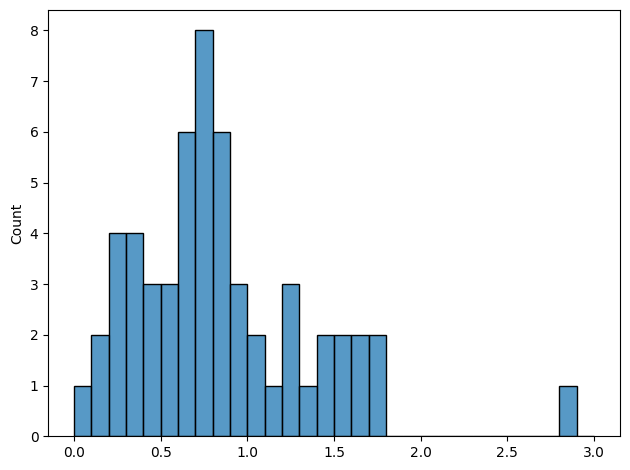

In [339]:
sns.histplot(errors, binwidth=0.1, binrange=(0, 3))
plt.tight_layout()